In [9]:
import subprocess

def install_libraries(*libraries):
    for library in libraries:
        try:
            subprocess.check_call(['pip', 'install', library])
            print(f"Successfully installed {library}")
        except subprocess.CalledProcessError as e:
            print(f"Failed to install {library}. Error: {e}")

# Example usage:
install_libraries('requests', 'numpy', 'matplotlib','networkx','pandas')


# ***importing required libs***


In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pandas import DataFrame as df

# ***Drawing functions***

## ***Func_1*** : **for the problem**

In [11]:
class CostMatrixGraph:
    def __init__(self, Cost_matrix):
        self.Cost_matrix = np.array(Cost_matrix)
        self.num_nodes = self.Cost_matrix.shape[0]
        self.graph = nx.Graph()
        self.create_graph()
        self.draw_graph()

    def create_graph(self):
        # Add nodes to the graph
        self.graph.add_nodes_from(range(self.num_nodes))

        # Add edges to the graph based on the cost matrix
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                self.graph.add_edge(i, j, weight=self.Cost_matrix[i, j])
                # self.graph.add_edge(i, j, )

    def draw_graph(self):
        
        # Draw the graph
        pos = nx.spring_layout(self.graph)  # You can use different layout algorithms
        nx.draw(self.graph, pos, with_labels=True, font_weight='bold',font_color="white", node_color='red', font_size=10)

        plt.title("berlin52.tsp")
        # Show the plot
        plt.savefig("TSP")
        plt.show()
   

## ***Func_2*** : **for the solution**

In [12]:
def draw_graph(path):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes from the path list
    for i in range(len(path)-1):
        G.add_edge(path[i], path[i+1])

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='red',font_color="white", node_size=300, arrowsize=10, linewidths=0, font_size=10)
    plt.title("solution")
    # Show the plot
    plt.savefig("solution")
    # Display the graph
    plt.show()

# ***Reading function:***

In [13]:
def read_tsp_file(file_path):
    """
    Reads a TSP file and creates a matrix of cost between cities.

    Parameters:
    - file_path (str): The path to the TSP file.

    Returns:
    - cost_matrix (list of lists): The matrix of cost between cities.
    """
    cost_matrix = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Find the dimension (number of cities) from the file
        dimension_line = [line.strip().split() for line in lines if line.startswith("DIMENSION")]
        dimension = int(dimension_line[0][1])

        # Find the section of the file where the coordinates are listed
        coord_section_start = lines.index("NODE_COORD_SECTION\n") + 1
        coord_section_end = coord_section_start + dimension

        # Extract coordinates and calculate cost
        coordinates = [list(map(float, line.strip().split()[1:])) for line in lines[coord_section_start:coord_section_end]]
        for i in range(dimension):
            row = []
            for j in range(dimension):
                if i == j:
                    row.append(0.0)  # cost from a city to itself is 0
                else:
                    # Calculate Euclidean cost between cities i and j
                    cost = ((coordinates[i][0] - coordinates[j][0]) ** 2 +
                                (coordinates[i][1] - coordinates[j][1]) ** 2) ** 0.5
                    row.append(cost)
            cost_matrix.append(row)

    return cost_matrix

# ***Simulated Annealing algorithm***

In [14]:


class TSPSimulatedAnnealing:
    def __init__(self, cost, initial_temperature=1000, cooling_rate=0.003, iterations=1000):
        """
        Constructor for the TSPSimulatedAnnealing class.

        :param cost: Matrix representing cost between cities.
        :param initial_temperature: Initial temperature for the simulated annealing algorithm.
        :param cooling_rate: Cooling rate to decrease the temperature over iterations.
        :param iterations: Number of iterations to perform the algorithm.
        """
        self.cost = cost
        self.num_cities = len(cost)
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.iterations = iterations

    def calculate_total_cost(self, order):
        """
        Calculate the total cost for a given city order.

        :param order: Order of cities.
        :return: Total cost for the given order.
        """
        total_cost = sum(self.cost[order[i]][order[i + 1]] for i in range(len(order) - 1))
        total_cost += self.cost[order[-1]][order[0]]  # Return to the starting city
        return total_cost

    def generate_random_order(self):
        """
        Generate a random order of cities.

        :return: Random order of cities.
        """
        return np.random.permutation(self.num_cities)

    def run_simulation(self):
        """
        Run the simulated annealing algorithm to solve the TSP.

        :return: Best order and corresponding cost.
        """
        current_order = self.generate_random_order()
        current_cost = self.calculate_total_cost(current_order)

        best_order = np.copy(current_order)
        best_cost = current_cost

        temperature = self.initial_temperature

        for _ in range(self.iterations):
            new_order = np.copy(current_order)
            i, j = np.random.choice(self.num_cities, size=2, replace=False)
            new_order[i], new_order[j] = new_order[j], new_order[i]

            new_cost = self.calculate_total_cost(new_order)

            delta_cost = new_cost - current_cost

            if delta_cost < 0 or np.random.rand() < np.exp(-delta_cost / temperature):
                current_order = np.copy(new_order)
                current_cost = new_cost

            if current_cost < best_cost:
                best_order = np.copy(current_order)
                best_cost = current_cost

            temperature *= 1 - self.cooling_rate

        return best_order, best_cost

# You need to provide the cost matrix before using the class





# **Usage example :( berlin52.tsp )**

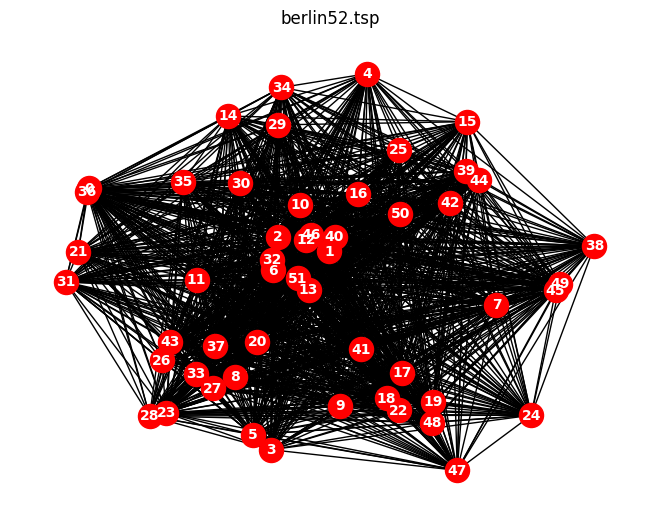


Best order: =>[20 24  5  3 25 12 13 51 10 39 32 42 14 36  4 34 37 46 26 27 50 11 35  0
 48 18  9 17 33 43  8  7 44 40 31 41  6 29  1 22 28 45 47 23 38  2 16 21
 15 30 49 19]


Best cost: 15614.901489729647



In [15]:
file_path = 'berlin52.tsp'
matrix = read_tsp_file(file_path)
# Using the class
tsp_solver = TSPSimulatedAnnealing(matrix)
best_order, best_cost = tsp_solver.run_simulation()
d=CostMatrixGraph(matrix)

# Print the TSP graph

print(f"\nBest order: =>{best_order}\n")

print(f"\nBest cost: {best_cost}\n")

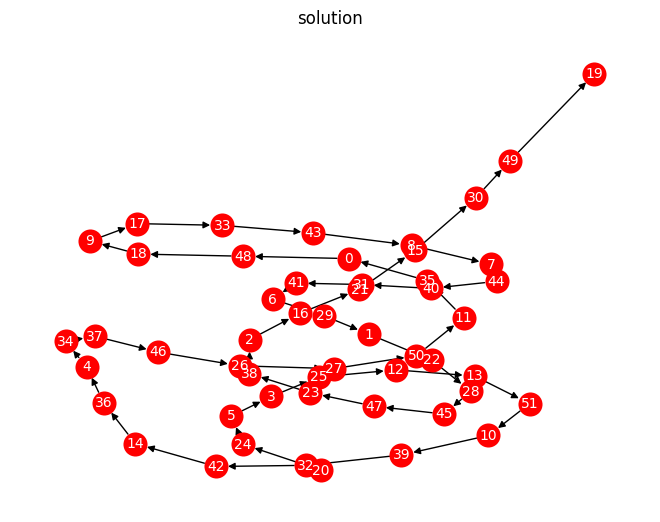

In [19]:
draw_graph(best_order)